#  EDA Case Study


First, let's import all the dependancies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
print('Packages imported successfully')

Packages imported successfully


Now. let's import the data sets

In [4]:
data_app = pd.read_csv('Data\\application_data.csv')

In [5]:
# Shape of dataframe
data_app_rows, data_app_cols = data_app.shape

In [6]:
data_prev_app = pd.read_csv('Data\\previous_application.csv')

In [7]:
# Shape of dataframe
data_prv_app_rows, data_prv_app_cols = data_prev_app.shape

Lets find columns with missing values

In [8]:
 app_data_mis_vals = round(data_app.isnull().sum()/data_app_rows*100,2)

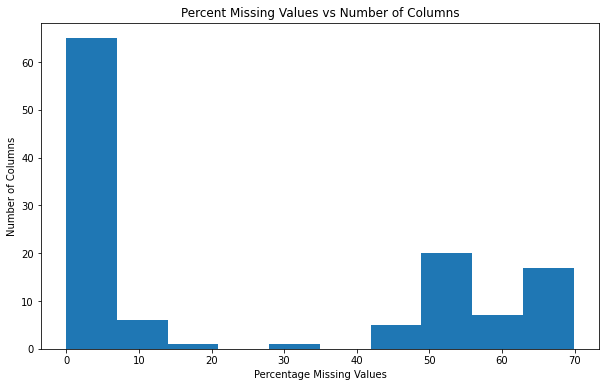

In [9]:
plt.figure(figsize=[10,6])
app_data_mis_vals.plot.hist().set(xlabel='Percentage Missing Values',ylabel='Number of Columns',title='Percent Missing Values vs Number of Columns')
plt.show()

From the above graph it is evident that there are many columns with missing values percentage more than 40%, since 40% is significant number for missing value we can drop these values.

In [10]:
#List of columns with missing values percentage greater than 40
drop_cols = app_data_mis_vals[app_data_mis_vals>40].index.tolist()

In [11]:
#Count of columns that need to be dropped
len(drop_cols)

49

In [12]:
#Dropping above columns
data_app.drop(labels=drop_cols,axis=1,inplace=True)

In [13]:
#Verifying the shape of the dataframe 
data_app.shape

(307511, 73)

In [14]:
#Lets get information obout the dataframe now
data_app.info(verbose=True,null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   TARGET                       int64  
 2   NAME_CONTRACT_TYPE           object 
 3   CODE_GENDER                  object 
 4   FLAG_OWN_CAR                 object 
 5   FLAG_OWN_REALTY              object 
 6   CNT_CHILDREN                 int64  
 7   AMT_INCOME_TOTAL             float64
 8   AMT_CREDIT                   float64
 9   AMT_ANNUITY                  float64
 10  AMT_GOODS_PRICE              float64
 11  NAME_TYPE_SUITE              object 
 12  NAME_INCOME_TYPE             object 
 13  NAME_EDUCATION_TYPE          object 
 14  NAME_FAMILY_STATUS           object 
 15  NAME_HOUSING_TYPE            object 
 16  REGION_POPULATION_RELATIVE   float64
 17  DAYS_BIRTH                   int64  
 18  DAYS_EMPLOYED                int64  
 19  DA

<ipython-input-14-e5d740f19301>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_app.info(verbose=True,null_counts=False)


In [15]:
 impute_cols = data_app.isnull().sum()/data_app_rows*100

In [16]:
impute_cols_list = impute_cols[impute_cols>0].index.tolist()

In [17]:
impute_cols_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
null_data = data_app[data_app.isnull().any(axis=1)]

In [19]:
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data_app['EXT_SOURCE_3'].value_counts(normalize=True)

0.746300    0.005922
0.713631    0.005334
0.694093    0.005176
0.670652    0.004831
0.652897    0.004681
              ...   
0.013948    0.000004
0.014148    0.000004
0.017506    0.000004
0.020455    0.000004
0.028275    0.000004
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [21]:
#This is normalized score form data source 3, we can impute missing values with average value
data_app['EXT_SOURCE_3'].fillna(data_app.EXT_SOURCE_3.mean,inplace=True)

In [22]:
data_app['EXT_SOURCE_2'].value_counts(normalize=True)

0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.157007    0.000003
0.721955    0.000003
0.032513    0.000003
0.204329    0.000003
0.064909    0.000003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [23]:
data_app['OCCUPATION_TYPE'].isnull().sum()

96391

In [24]:
data_app['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
#OCCUPATION_TYPE column has unordered categorical values, we can impute missing values with a value 'Unavailable'
data_app['OCCUPATION_TYPE'].fillna('Unavailable',inplace=True)

In [26]:
#Lets look at CNT_FAM_MEMBERS column, number of missing values
data_app['CNT_FAM_MEMBERS'].isnull().sum()

2

In [27]:
#Lets look at CNT_FAM_MEMBERS column, 
df = data_app['CNT_FAM_MEMBERS'].value_counts().to_frame(name='Number of Families')
df['Count of Family Members']= df.index.astype('Int64')
df.reset_index(drop=True, inplace=True)

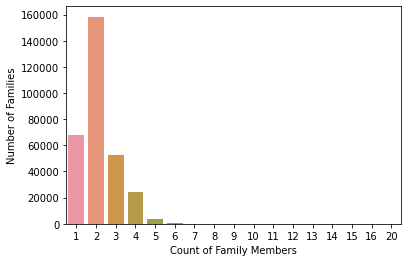

In [28]:
sns.barplot(data=df, x='Count of Family Members', y='Number of Families')
plt.show()

It can be seen most of the families 2 family members, hence it is safe to impute missing values with Mode of CNT_FAM_MEMBERS column

In [29]:
data_app['CNT_FAM_MEMBERS'].fillna(data_app.CNT_FAM_MEMBERS.mode,inplace=True)

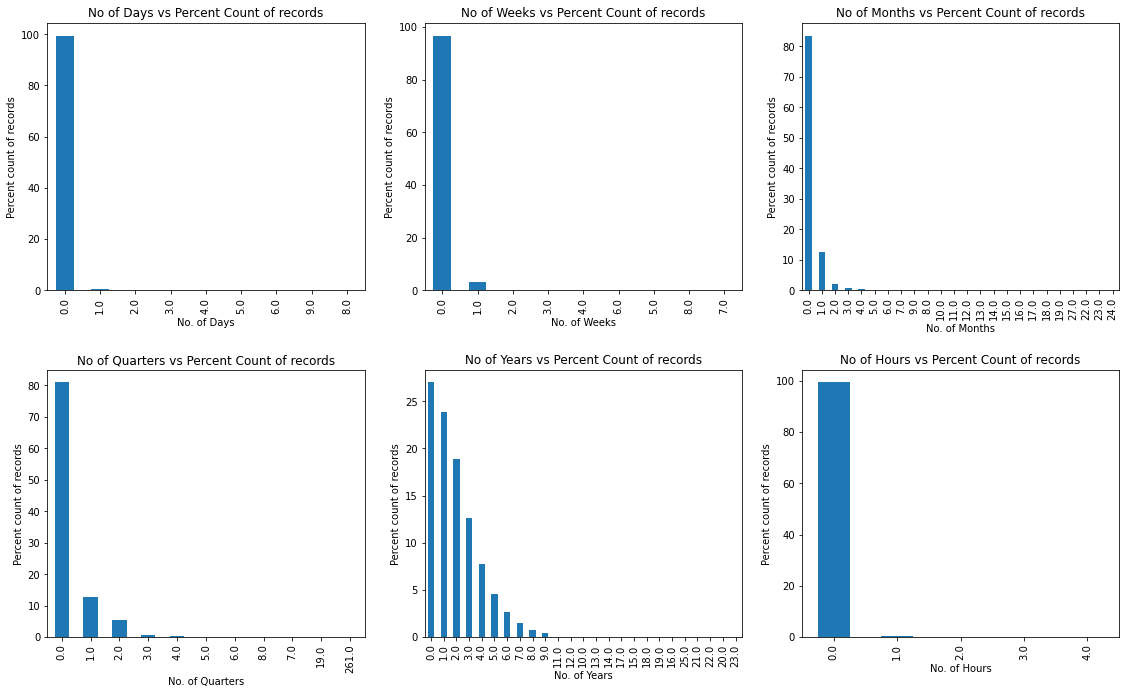

In [30]:
#Lets see the AMT_REQ_CREDIT_BUREAU_* columns

plt.figure(figsize=[16,10],)

plt.subplot(2,3,1) 
tmp_df = data_app.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100
tmp_df.plot.bar().set(xlabel= 'No. of Days', ylabel='Percent count of records',title='No of Days vs Percent Count of records')

plt.subplot(2,3,2) 
tmp_df1 = data_app.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100
tmp_df1.plot.bar().set(xlabel= 'No. of Weeks', ylabel='Percent count of records',title='No of Weeks vs Percent Count of records')

plt.subplot(2,3,3) 
tmp_df2 = data_app.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100
tmp_df2.plot.bar().set(xlabel= 'No. of Months', ylabel='Percent count of records',title='No of Months vs Percent Count of records')

plt.subplot(2,3,4) 
tmp_df3 = data_app.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100
tmp_df3.plot.bar().set(xlabel= 'No. of Quarters', ylabel='Percent count of records',title='No of Quarters vs Percent Count of records')

plt.subplot(2,3,5) 
tmp_df4 = data_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100
tmp_df4.plot.bar().set(xlabel= 'No. of Years', ylabel='Percent count of records',title='No of Years vs Percent Count of records')

plt.subplot(2,3,6) 
tmp_df5 = data_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100
tmp_df5.plot.bar().set(xlabel= 'No. of Hours', ylabel='Percent count of records',title='No of Hours vs Percent Count of records')
plt.tight_layout(pad=2.0)
plt.show()


As 99% of the values in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_QRT columns are 0, hence it is safe to impute missing values with 0

For AMT_REQ_CREDIT_BUREAU_YEAR column we can impute missing values with the median number of years

In [31]:
data_app.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':0,
 'AMT_REQ_CREDIT_BUREAU_DAY':0,
 'AMT_REQ_CREDIT_BUREAU_WEEK':0,
 'AMT_REQ_CREDIT_BUREAU_MON':0,
 'AMT_REQ_CREDIT_BUREAU_QRT':0,
 'AMT_REQ_CREDIT_BUREAU_YEAR':data_app.AMT_REQ_CREDIT_BUREAU_YEAR.median()},inplace=True,)

###AMT_ANNUITY and AMT_GOODS_PRICE columns

In [32]:
data_app['AMT_GOODS_PRICE'].value_counts()
#data_app[['AMT_ANNUITY','AMT_GOODS_PRICE']].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

##Let's look at Invalid data in the dataset if any

##First lets see columns with Object data types


In [33]:
data_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [34]:
obj_cols = data_app.select_dtypes(np.object ).columns.tolist()
obj_cols

<ipython-input-34-b169a4618e45>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_cols = data_app.select_dtypes(np.object ).columns.tolist()


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_3']

In [35]:
data_app.NAME_CONTRACT_TYPE.value_counts()
#No issues with this column

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [36]:
data_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are 4 records that do not belong to Male or Female customers, hence we can drop the records respective to these values

In [37]:
drop_genders = data_app[data_app.CODE_GENDER =="XNA"].index
data_app.drop(drop_genders, inplace=True)

In [38]:
#data_app = data_app[~ (data_app.CODE_GENDER =="XNA")]

In [39]:
data_app.FLAG_OWN_CAR.value_counts()
#No issues with this column

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [40]:
data_app.FLAG_OWN_REALTY.value_counts()
#No issues with this column

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [41]:
data_app.NAME_TYPE_SUITE.value_counts()
#No issues with this column

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
data_app.ORGANIZATION_TYPE.value_counts()
#No issues with this column

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

There are 55374 records where there is no information about the Organisation Type, we can keep it as-is.

In [43]:
data_app.NAME_HOUSING_TYPE.value_counts()
#No issues with this column

House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

##Now lets look at invalid data in numeric columns 

In [44]:
int_cols = data_app.select_dtypes(np.int64).columns.tolist()
data_app[int_cols]

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,-9327,-236,-1982,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,-20775,365243,-4090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Since there are Days_* columns with the duration data till the loan application was made, as we do not have age data of the customer we can calculate the same from DAYS_BIRTH

In [45]:
data_app['Age_Years'] = data_app.DAYS_BIRTH.apply(lambda x: int(np.floor(abs(x)/365)))

In [46]:
data_app.Age_Years

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: Age_Years, Length: 307507, dtype: int64

In [47]:
float_cols = data_app.select_dtypes(np.float64).columns.tolist()
data_app[float_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,0.650442,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,0.681632,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,0.115992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,0.535722,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,0.514163,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


There are two columns DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE which should have been of type int64, so lets change their data type

In [48]:
data_app.DAYS_REGISTRATION = data_app.DAYS_REGISTRATION.astype('int64')
data_app.DAYS_LAST_PHONE_CHANGE = data_app.DAYS_LAST_PHONE_CHANGE.notna().astype('int64')

In [49]:
data_app.DAYS_REGISTRATION

0        -3648
1        -1186
2        -4260
3        -9833
4        -4311
          ... 
307506   -8456
307507   -4388
307508   -6737
307509   -2562
307510   -5128
Name: DAYS_REGISTRATION, Length: 307507, dtype: int64

#Finding Outliers in the Dataset

In [50]:
num_cols = data_app.select_dtypes([np.int64,np.float64]).columns.tolist()
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DO

[Text(0.5, 1.0, 'Box plot for Total Income Amount')]

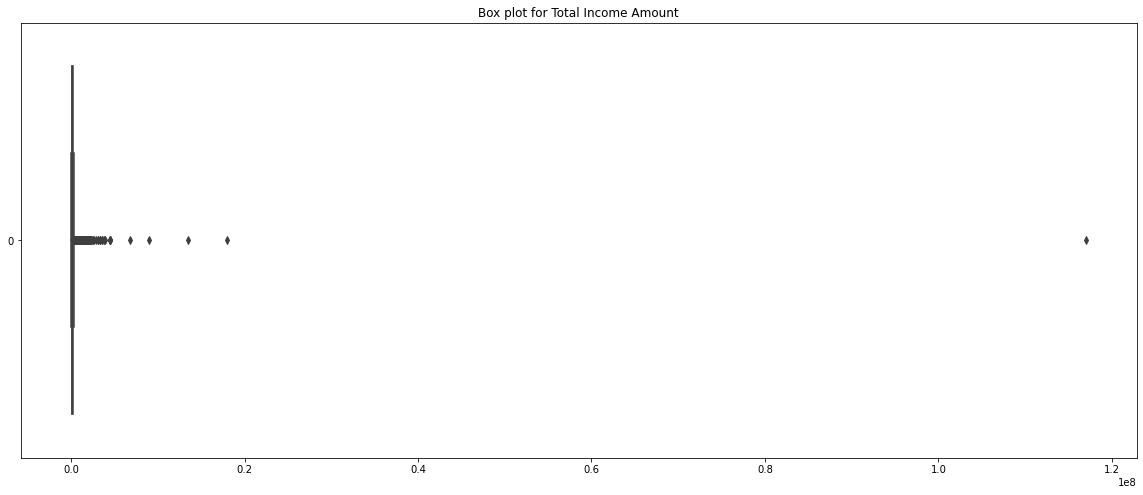

In [51]:
plt.figure(figsize=[20,8])
INCOME_TOTAL = data_app.AMT_INCOME_TOTAL
sns.boxplot(data=INCOME_TOTAL, orient='h').set(title='Box plot for Total Income Amount')


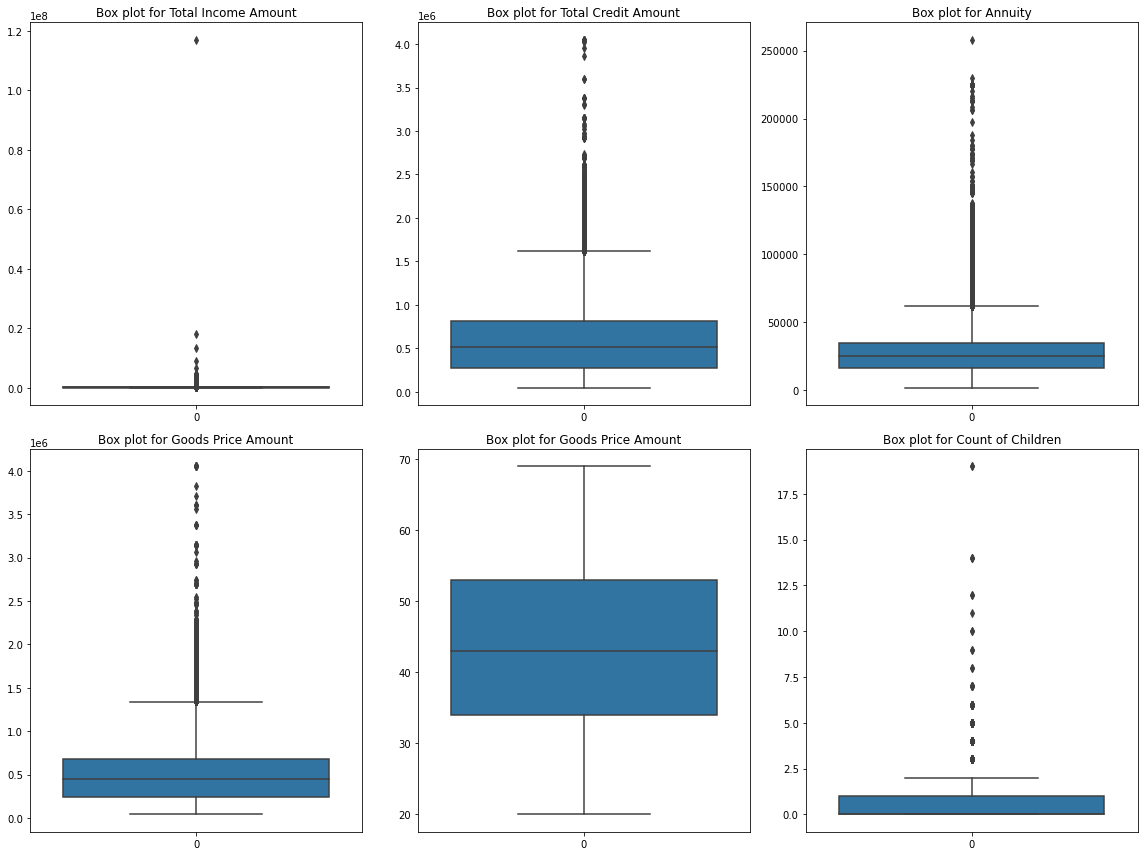

In [52]:
plt.figure(figsize=[16,12])

plt.subplot(2,3,1)
INCOME_TOTAL = data_app.AMT_INCOME_TOTAL
sns.boxplot(data=INCOME_TOTAL).set(title='Box plot for Total Income Amount')

plt.subplot(2,3,2)
CREDIT = data_app.AMT_CREDIT
sns.boxplot(data=CREDIT).set(title='Box plot for Total Credit Amount')

plt.subplot(2,3,3)
ANNUITY = data_app.AMT_ANNUITY
sns.boxplot(data=ANNUITY).set(title='Box plot for Annuity')

plt.subplot(2,3,4)
GOODS_PRICE = data_app.AMT_GOODS_PRICE
sns.boxplot(data=GOODS_PRICE).set(title='Box plot for Goods Price Amount')

plt.subplot(2,3,5)
AGE = data_app.Age_Years
sns.boxplot(data=AGE).set(title='Box plot for Goods Price Amount')

plt.subplot(2,3,6)
CHILDREN = data_app.CNT_CHILDREN
sns.boxplot(data=CHILDREN).set(title='Box plot for Count of Children')
plt.tight_layout()
plt.show()

##Lets remove the outliers

In [53]:
INCOME_90 = data_app.AMT_INCOME_TOTAL.quantile(q=0.9)

In [54]:
data_app.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [55]:
CREDIT_95 = data_app.AMT_CREDIT.quantile(q=0.95)

In [56]:
data_app.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [57]:
ANNUITY_97 = data_app.AMT_ANNUITY.quantile(q=0.97)

In [58]:
data_app.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [59]:
GOODS_PRICE_97 = data_app.AMT_GOODS_PRICE.quantile(q=0.97)

In [60]:
data_app.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [61]:
CNT_CHILDREN_999 = data_app.CNT_CHILDREN.quantile(q=0.999)

#Removing the outliers

In [62]:
app_data_final=data_app.copy()
app_data_final=app_data_final[app_data_final['AMT_INCOME_TOTAL'] <=INCOME_90]
app_data_final=app_data_final[app_data_final['AMT_ANNUITY'] <=ANNUITY_97]
app_data_final=app_data_final[app_data_final['AMT_GOODS_PRICE'] <=GOODS_PRICE_97]
app_data_final=app_data_final[app_data_final['CNT_CHILDREN'] <=CNT_CHILDREN_999]
app_data_final=app_data_final[app_data_final['AMT_CREDIT'] <=CREDIT_95]

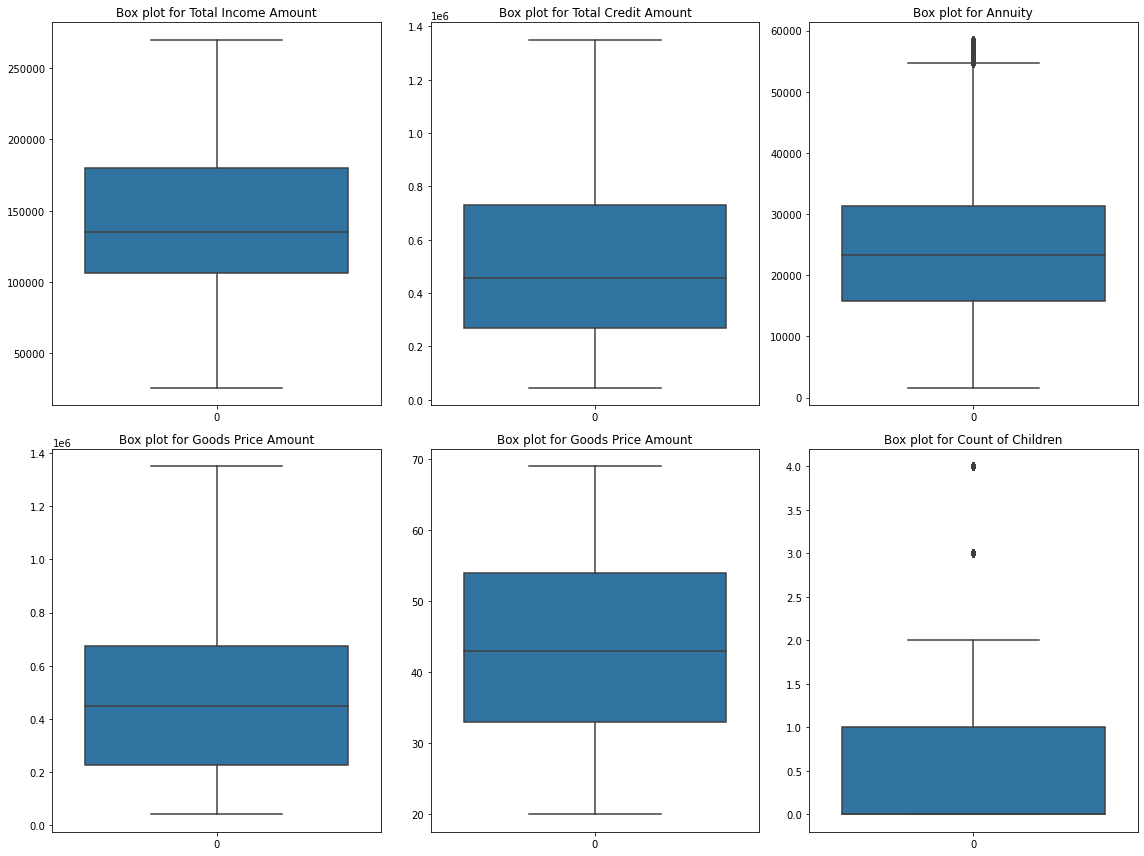

In [63]:
plt.figure(figsize=[16,12])

plt.subplot(2,3,1)
INCOME_TOTAL_NEW = app_data_final.AMT_INCOME_TOTAL
sns.boxplot(data=INCOME_TOTAL_NEW).set(title='Box plot for Total Income Amount')

plt.subplot(2,3,2)
CREDIT_NEW = app_data_final.AMT_CREDIT
sns.boxplot(data=CREDIT_NEW).set(title='Box plot for Total Credit Amount')

plt.subplot(2,3,3)
ANNUITY_NEW = app_data_final.AMT_ANNUITY
sns.boxplot(data=ANNUITY_NEW).set(title='Box plot for Annuity')

plt.subplot(2,3,4)
GOODS_PRICE_NEW = app_data_final.AMT_GOODS_PRICE
sns.boxplot(data=GOODS_PRICE_NEW).set(title='Box plot for Goods Price Amount')

plt.subplot(2,3,5)
AGE_NEW = app_data_final.Age_Years
sns.boxplot(data=AGE_NEW).set(title='Box plot for Goods Price Amount')

plt.subplot(2,3,6)
CHILDREN_NEW = app_data_final.CNT_CHILDREN
sns.boxplot(data=CHILDREN_NEW).set(title='Box plot for Count of Children')
plt.tight_layout()
plt.show()

#From the above graphs we can see that the most of the outliers have been removed

#Lets see if there are any contious numerical columns

In [64]:
app_data_final.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,39
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,27
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,55


There are AMT_* columns and Age_Years which has continous numerical values, we can perform binning on these columns

In [68]:
app_data_final.Age_Years.describe()

count    267610.000000
mean         43.457326
std          12.163040
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age_Years, dtype: float64

In [69]:
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80']
cut_bins = [0, 10,20,30,40,50,60,70,80]
app_data_final['Age_Groups'] = pd.cut(app_data_final['Age_Years'], bins=cut_bins, labels=cut_labels)

In [70]:
app_data_final['Age_Groups']

0         21-30
1         41-50
2         51-60
3         51-60
4         51-60
          ...  
307506    21-30
307507    51-60
307508    41-50
307509    31-40
307510    41-50
Name: Age_Groups, Length: 267610, dtype: category
Categories (8, object): ['0-10' < '11-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80']

Now lets bin the AMT_INCOME_TOTAL column

In [71]:
app_data_final.AMT_INCOME_TOTAL.describe()

count    267610.000000
mean     144650.112098
std       54791.690530
min       25650.000000
25%      106200.000000
50%      135000.000000
75%      180000.000000
max      270000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
cut_lbl = ['0-50000', '50001-100000', '100001-150000', '150001-200000','200001-250000','250001-300000']
cut_bns = [0, 50000, 100000, 150000, 200000, 250000, 300000]
app_data_final['INCOME_GROUP'] = pd.cut(app_data_final['AMT_INCOME_TOTAL'], bins=cut_bns, labels=cut_lbl)

In [74]:
app_data_final['INCOME_GROUP']

0         200001-250000
1         250001-300000
2          50001-100000
3         100001-150000
4         100001-150000
              ...      
307506    150001-200000
307507     50001-100000
307508    150001-200000
307509    150001-200000
307510    150001-200000
Name: INCOME_GROUP, Length: 267610, dtype: category
Categories (6, object): ['0-50000' < '50001-100000' < '100001-150000' < '150001-200000' < '200001-250000' < '250001-300000']

### Lets see how is the distribution of the data in the columns, we can see if the data is skewed or balanced, We will be analysing the Gender, Income and Age

<AxesSubplot:xlabel='Age_Groups', ylabel='Count'>

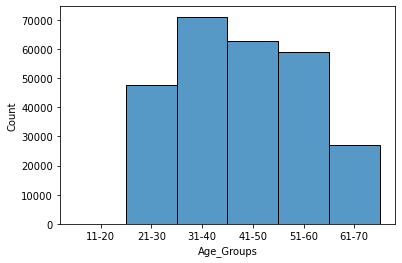

In [171]:
AGE = app_data_final.Age_Groups
sns.histplot(AGE)

In [163]:
AGE

,No of Applicants
Age_Groups,
31-40,71076
41-50,62605
51-60,59001
21-30,47802
61-70,27125
11-20,1
0-10,0
71-80,0


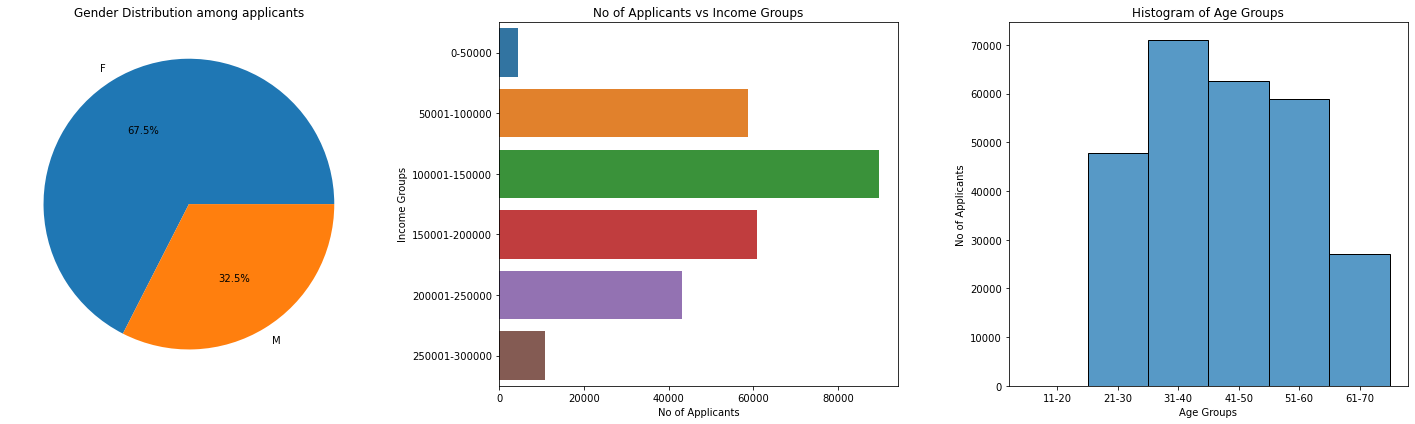

In [181]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)

GENDER = app_data_final.CODE_GENDER.value_counts(normalize=True).rename_axis('Gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.Gender, autopct='%1.1f%%')
plt.title('Gender Distribution among applicants')

plt.subplot(1,3,2)
INCOME = app_data_final.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups')

plt.subplot(1,3,3)
AGE = app_data_final.Age_Groups
sns.histplot(AGE).set(xlabel='Age Groups', ylabel='No of Applicants', title='Histogram of Age Groups')


plt.tight_layout()
plt.show()